In [117]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [118]:
# Connect to the SQLite database
conn = sqlite3.connect('Cuisine_data.db')

# Query the database
query = "SELECT * FROM CuisineRating;"

In [119]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the DataFrame
df.head()

,UserID,AreaCode,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,OftenAS
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.50,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.00,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.00,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.00,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.00,No


In [120]:
df.shape

(200, 15)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         200 non-null    int64  
 1   AreaCode       200 non-null    int64  
 2   Location       200 non-null    object 
 3   Gender         200 non-null    object 
 4   YOB            200 non-null    int64  
 5   MaritalStatus  200 non-null    object 
 6   Activity       200 non-null    object 
 7   Budget         200 non-null    int64  
 8   Cuisines       200 non-null    object 
 9   Alcohol        200 non-null    object 
 10  Smoker         200 non-null    object 
 11  FoodRating     200 non-null    int64  
 12  ServiceRating  200 non-null    int64  
 13  OverallRating  200 non-null    float64
 14  OftenAS        200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [122]:
df.columns

Index(['UserID', 'AreaCode', 'Location', 'Gender', 'YOB', 'MaritalStatus',
       'Activity', 'Budget', 'Cuisines', 'Alcohol', 'Smoker', 'FoodRating',
       'ServiceRating', 'OverallRating', 'OftenAS'],
      dtype='object')

In [123]:
df.nunique()

UserID           200
AreaCode          65
Location          10
Gender             2
YOB               46
MaritalStatus      3
Activity           2
Budget             5
Cuisines           7
Alcohol            3
Smoker             3
FoodRating         5
ServiceRating      5
OverallRating      9
OftenAS            2
dtype: int64

In [124]:
for i in df.iloc[:, 1:]:
    print(i, df[i].unique())

AreaCode [153 123 122 129 111 107 154 117 192 137 121 198 172 188 166 124 131 149
 101 104 140 145 159 195 105 130 139 113 127 134 148 158 161 167 176 110
 120 142 162 173 184 199 102 106 157 185 147 183 138 136 169 196 175 135
 125 186 194 182 197 179 163 178 103 170 160]
Location ['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Central Park,ny' 'Market City, MY' 'Cedar Hill, NY']
Gender ['Female' 'Male']
YOB [2006 1991 1977 1956 1997 1995 2003 1965 1975 1963 1980 2007 2004 2001
 1959 2009 1983 1971 1974 1969 2000 1988 1999 1998 1990 1987 1986 1967
 1985 1976 2005 1989 1958 1981 1962 1964 1955 2002 1996 1961 1957 1994
 1979 1978 1960 1982]
MaritalStatus ['Single' 'Married' 'Divorced']
Activity ['Professional' 'Student']
Budget [3 5 4 1 2]
Cuisines ['Japanese' 'Indian' 'Seafood' 'Filipino' 'Italian' 'Chinese' 'French']
Alcohol ['Never' 'Often' 'Socially']
Smoker ['Never' 'Socially' 'Often']
FoodRating [5 1

### **Data Cleaning**

In [125]:
df.isnull().sum()

UserID           0
AreaCode         0
Location         0
Gender           0
YOB              0
MaritalStatus    0
Activity         0
Budget           0
Cuisines         0
Alcohol          0
Smoker           0
FoodRating       0
ServiceRating    0
OverallRating    0
OftenAS          0
dtype: int64

In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
df.describe()

,UserID,AreaCode,YOB,Budget,FoodRating,ServiceRating,OverallRating
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,141.06,1.98k,3.82,3.22,3.23,3.22
std,57.88,26.13,16.81,1.06,1.41,1.53,1.08
min,1.00,101.00,1.96k,1.00,1.00,1.00,1.00
25%,50.75,123.00,1.97k,3.00,2.00,2.00,2.50
50%,100.50,135.00,1.99k,4.00,3.00,3.00,3.00
75%,150.25,158.00,2.00k,5.00,5.00,5.00,4.00
max,200.00,199.00,2.01k,5.00,5.00,5.00,5.00


In [128]:
df.head()

,UserID,AreaCode,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,OftenAS
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.50,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.00,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.00,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.00,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.00,No


In [129]:
df1 = df.drop(columns=['UserID'], axis=1)

### **Creating New Feature**

In [130]:
from datetime import date
df1['Age'] = date.today().year - df1['YOB']

In [131]:
def categorize(age):
    if age < 17.0:
        return 'Young'
    elif age<34.0:
        return 'Adult'
    elif age< 54.0:
        return 'Middle age'
    else:
        return 'Seniors'

df1['Age_group'] = df1['Age'].apply(categorize)

In [132]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
AreaCode,200.00,141.06,26.13,101.00,123.00,135.00,158.00,199.00
YOB,200.00,1.98k,16.81,1.96k,1.97k,1.99k,2.00k,2.01k
Budget,200.00,3.82,1.06,1.00,3.00,4.00,5.00,5.00
FoodRating,200.00,3.22,1.41,1.00,2.00,3.00,5.00,5.00
ServiceRating,200.00,3.23,1.53,1.00,2.00,3.00,5.00,5.00
OverallRating,200.00,3.22,1.08,1.00,2.50,3.00,4.00,5.00


In [133]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Location,200,10,"St. George,NY",46
Gender,200,2,Male,118
MaritalStatus,200,3,Single,100
Activity,200,2,Student,120
Cuisines,200,7,Japanese,36
Alcohol,200,3,Never,88
Smoker,200,3,Socially,71
OftenAS,200,2,No,174


### **EDA**

In [134]:
num = df1.select_dtypes(include=[np.number]).columns.tolist()
cat = df1.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Columns: ", num)
print("Categorical Columns: ", cat)

Numerical Columns:  ['AreaCode', 'YOB', 'Budget', 'FoodRating', 'ServiceRating', 'OverallRating', 'Age']
Categorical Columns:  ['Location', 'Gender', 'MaritalStatus', 'Activity', 'Cuisines', 'Alcohol', 'Smoker', 'OftenAS', 'Age_group']


AreaCode


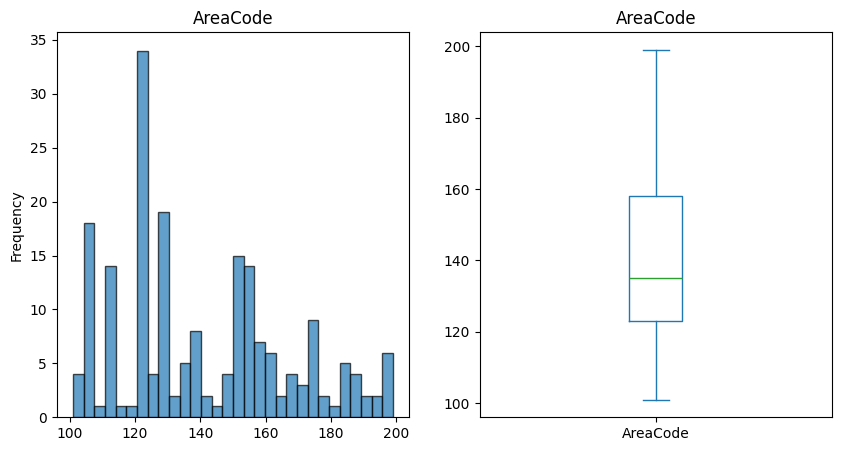

YOB


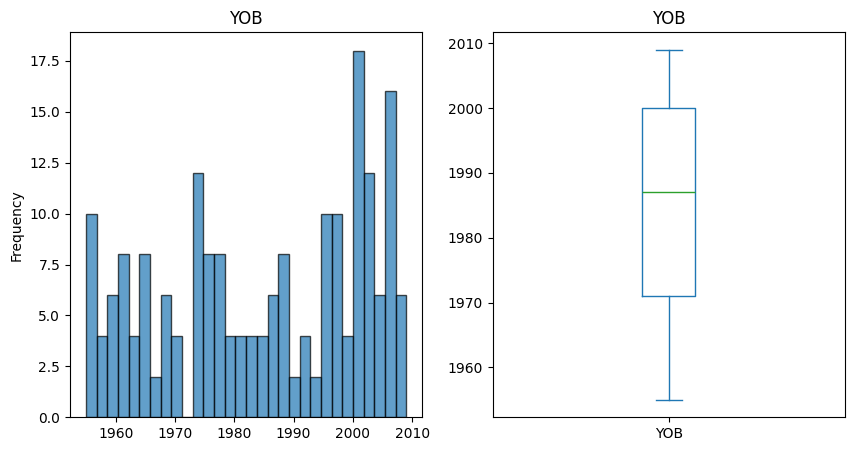

Budget


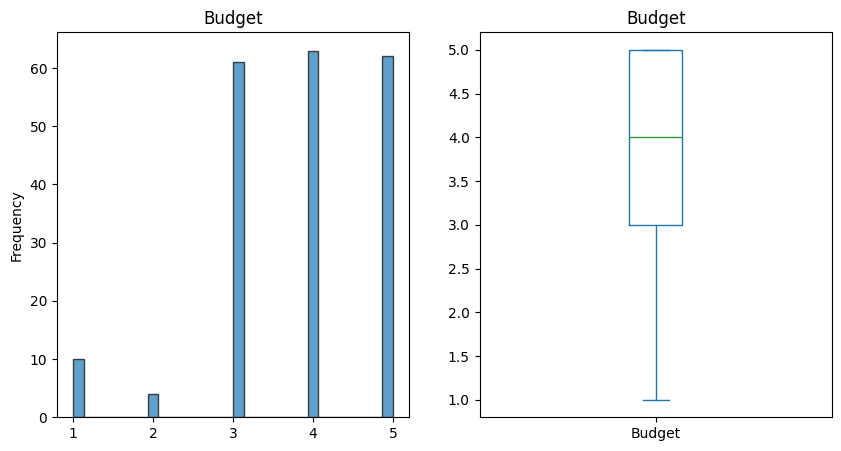

FoodRating


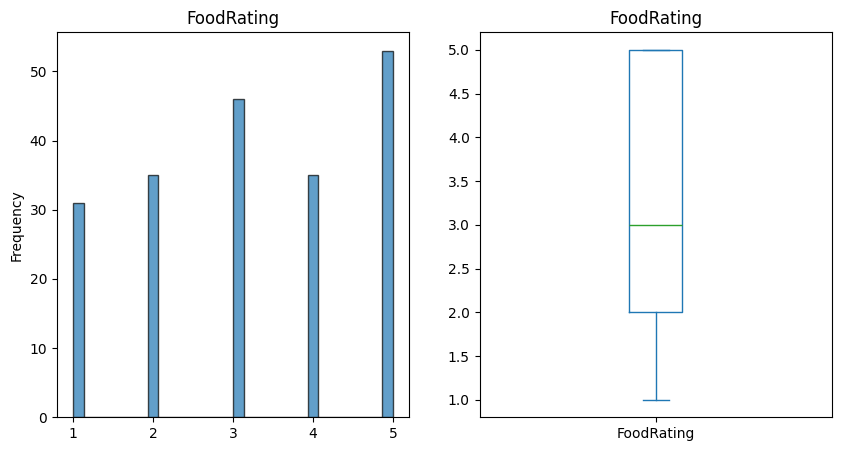

ServiceRating


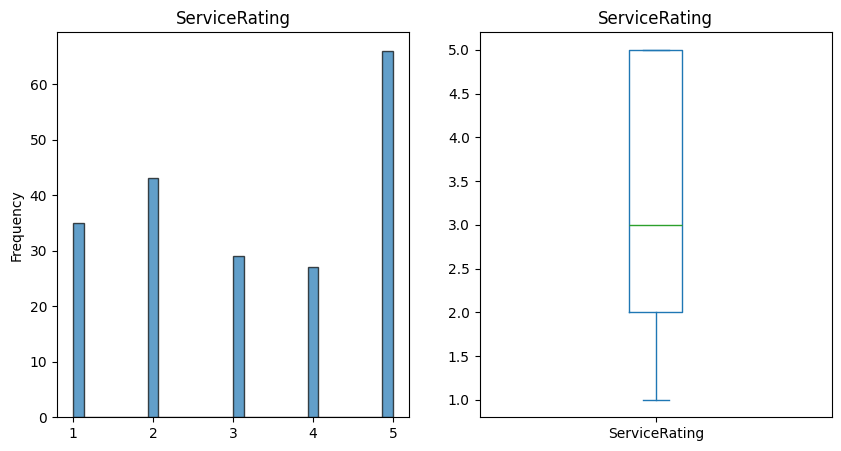

OverallRating


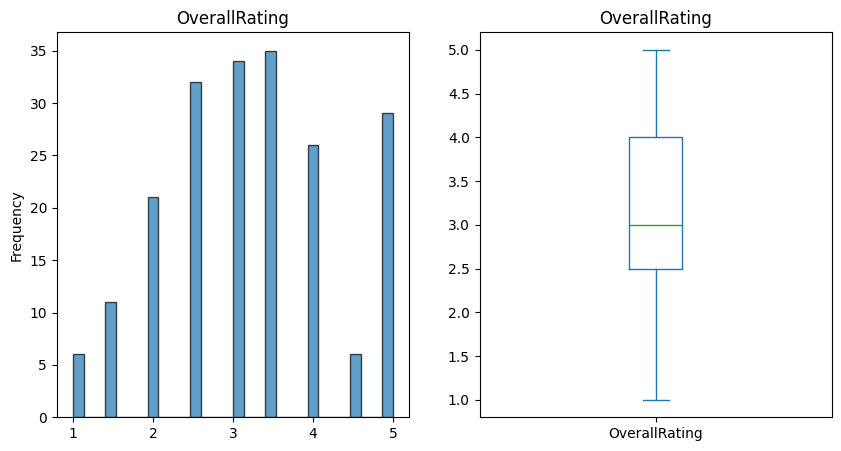

Age


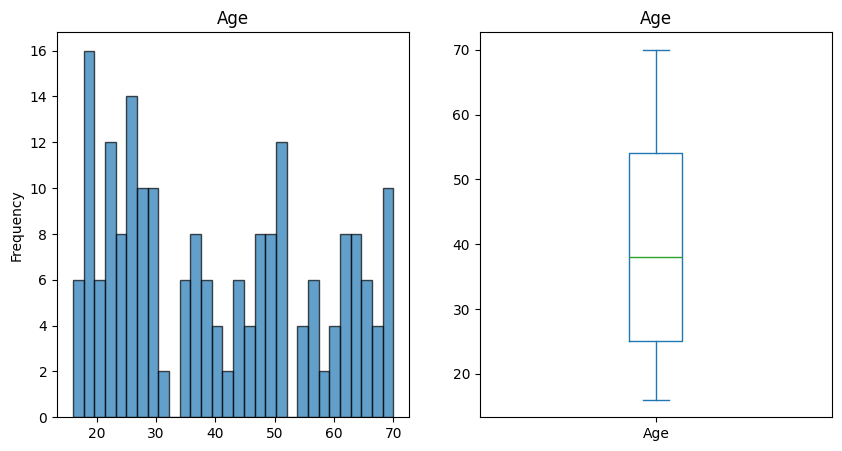

In [135]:
for col in num:
    print(col)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    df1[col].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    plt.ylabel('Frequency')
    plt.title(col)
    
    plt.subplot(122)
    df1[col].plot(kind='box')
    plt.title(col)
    plt.show()

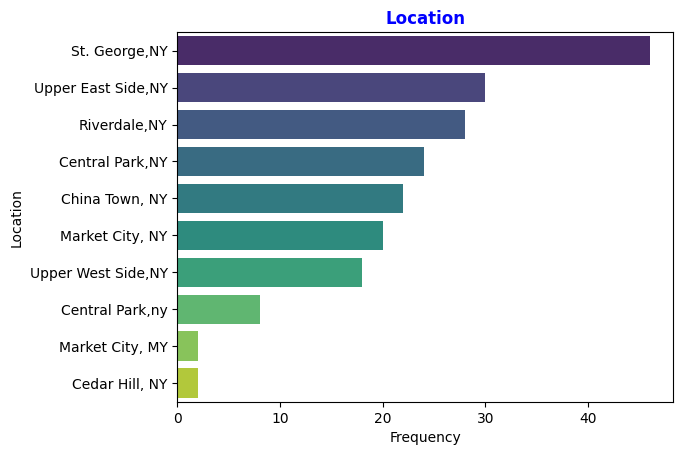

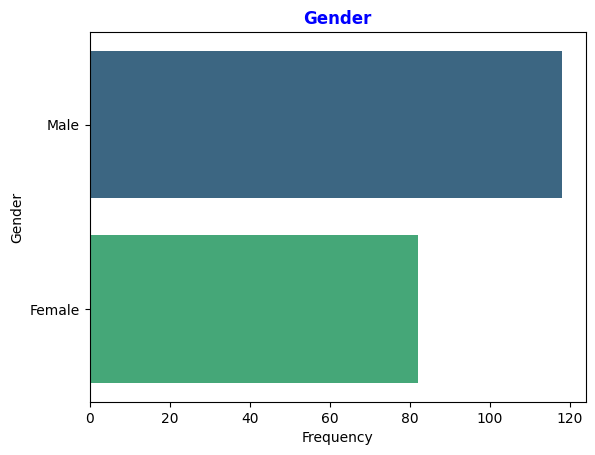

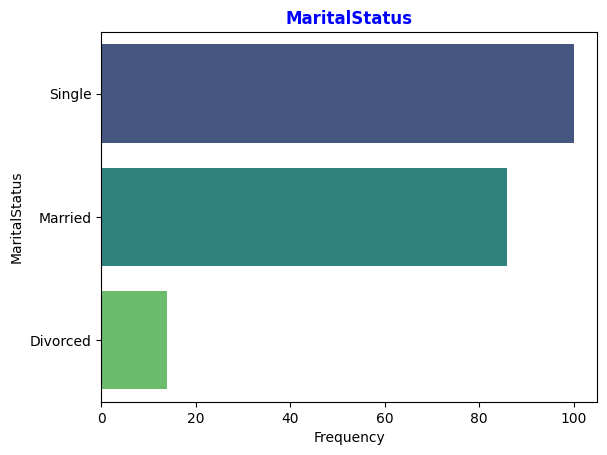

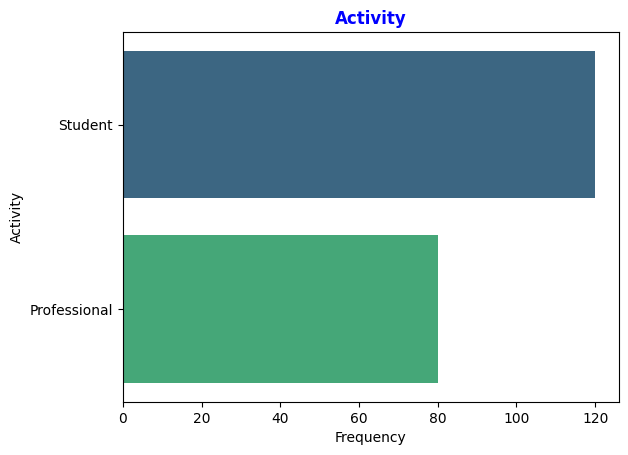

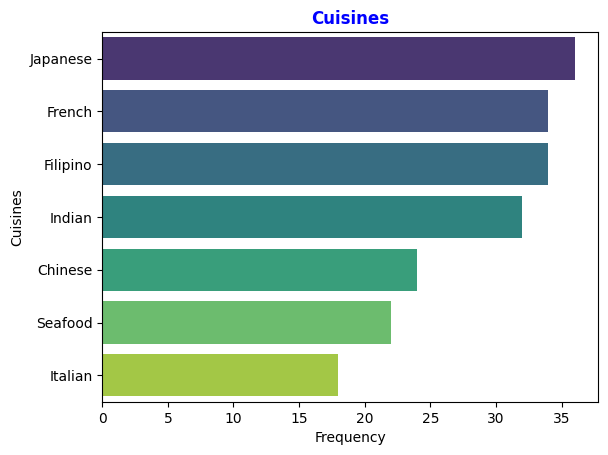

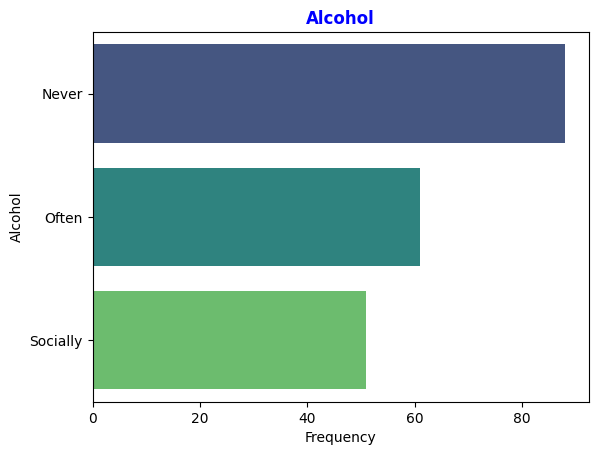

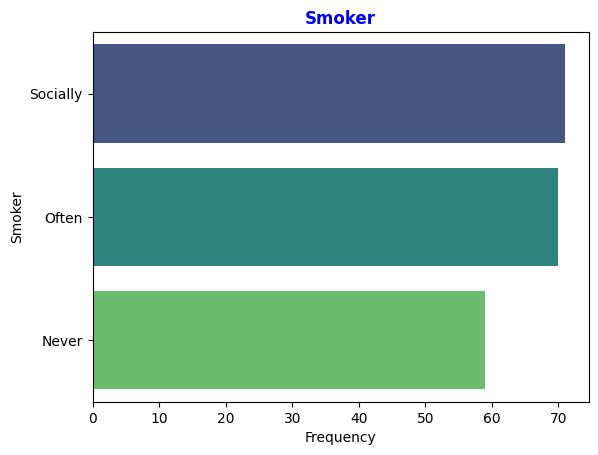

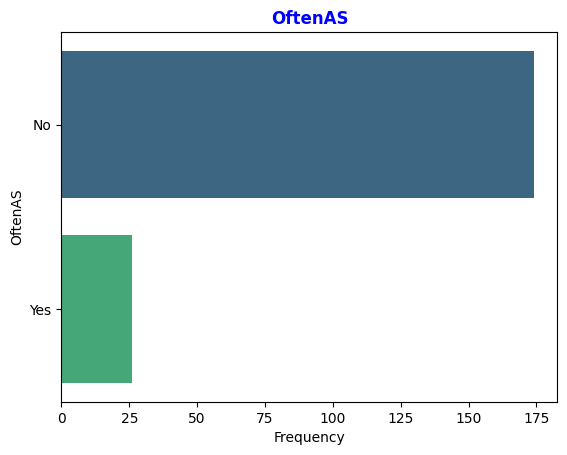

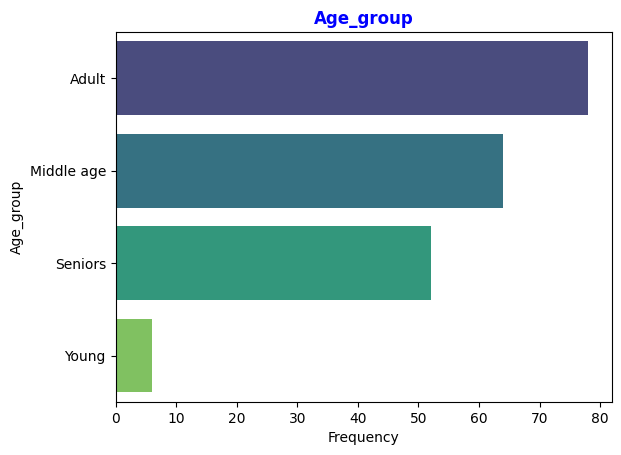

In [136]:
for col in cat:
    sns.countplot(df1[col], order=df1[col].value_counts().index, palette='viridis')
    plt.title(col, fontsize=12, fontweight='bold', color='blue')
    plt.xlabel('Frequency')
    plt.show()

### **Insights**

In [137]:
df1['Location'].value_counts()

Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

In [138]:
df1['Gender'].value_counts()

Gender
Male      118
Female     82
Name: count, dtype: int64

In [139]:
df1['MaritalStatus'].value_counts()

MaritalStatus
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

In [140]:
df1['Activity'].value_counts()

Activity
Student         120
Professional     80
Name: count, dtype: int64

In [141]:
df1['Budget'].value_counts()

Budget
4    63
5    62
3    61
1    10
2     4
Name: count, dtype: int64

In [142]:
df1['Cuisines'].value_counts()

Cuisines
Japanese    36
French      34
Filipino    34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

In [143]:
df1['Alcohol'].value_counts()

Alcohol
Never       88
Often       61
Socially    51
Name: count, dtype: int64

In [144]:
df1['Smoker'].value_counts()

Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64

In [145]:
df1['FoodRating'].value_counts()

FoodRating
5    53
3    46
2    35
4    35
1    31
Name: count, dtype: int64

In [146]:
df1['ServiceRating'].value_counts()

ServiceRating
5    66
2    43
1    35
3    29
4    27
Name: count, dtype: int64

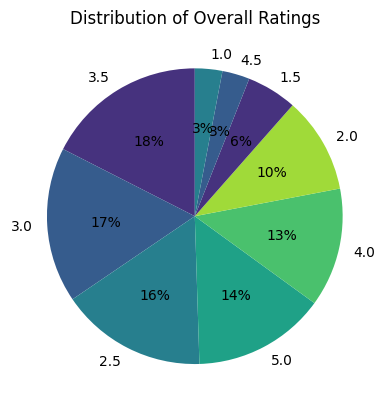

In [155]:
plt.pie(df1['OverallRating'].value_counts(), labels=df1['OverallRating'].value_counts().index, autopct='%1.f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Overall Ratings')
plt.show()

In [147]:
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

In [163]:
location_rate = df1.groupby('Location').agg({'FoodRating':'mean', "ServiceRating":'mean', "OverallRating":'mean'}).sort_values(by='OverallRating', ascending=False).reset_index()
location_rate.style.background_gradient(cmap='Blues', subset=['FoodRating', 'ServiceRating', 'OverallRating'])

,Location,FoodRating,ServiceRating,OverallRating
0,"Market City, NY",4.050000,3.400000,3.725000
1,"Central Park,ny",3.125000,4.250000,3.687500
2,"Cedar Hill, NY",2.000000,5.000000,3.500000
3,"Central Park,NY",3.416667,3.458333,3.437500
4,"China Town, NY",2.681818,3.636364,3.159091
5,"Upper West Side,NY",3.000000,3.277778,3.138889
6,"St. George,NY",3.413043,2.826087,3.119565
7,"Riverdale,NY",3.035714,3.071429,3.053571
8,"Upper East Side,NY",2.966667,3.066667,3.016667
9,"Market City, MY",4.000000,2.000000,3.000000


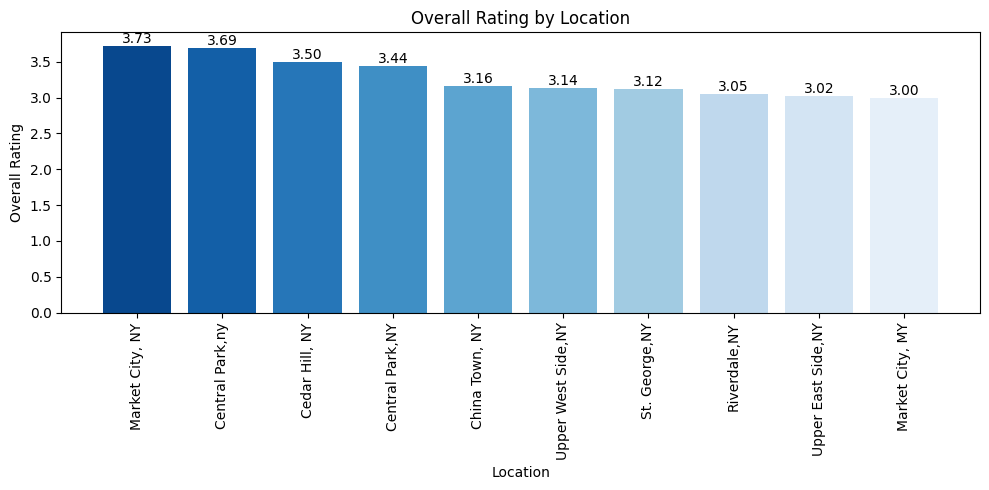

In [165]:
plt.figure(figsize=(10, 5))
bar_value = plt.bar(location_rate['Location'], location_rate['OverallRating'], color=sns.color_palette('Blues_r', 10))
plt.bar_label(bar_value, fmt='%.2f', label_type='edge')
plt.xlabel('Location')
plt.ylabel('Overall Rating')
plt.title('Overall Rating by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [94]:
Gender_rate = df1.groupby('Gender').agg({'FoodRating':'mean', "ServiceRating":'mean', "OverallRating":'mean'}).sort_values(by='OverallRating', ascending=False).reset_index()
Gender_rate.style.background_gradient(cmap='Set3')

,Gender,FoodRating,ServiceRating,OverallRating
0,Female,3.329268,3.341463,3.335366
1,Male,3.144068,3.152542,3.148305


In [96]:
location_rate = df1.groupby('Activity').agg({'FoodRating':'mean', "ServiceRating":'mean', "OverallRating":'mean'}).sort_values(by='OverallRating', ascending=False).reset_index()
location_rate.style.background_gradient(cmap='Set3')

,Activity,FoodRating,ServiceRating,OverallRating
0,Professional,3.387500,3.500000,3.443750
1,Student,3.108333,3.050000,3.079167


In [166]:
cuisines_rate = df1.groupby('Cuisines').agg({'FoodRating':'mean', "ServiceRating":'mean', "OverallRating":'mean'}).sort_values(by='OverallRating', ascending=False).reset_index()
cuisines_rate.style.background_gradient(cmap='Greens')

,Cuisines,FoodRating,ServiceRating,OverallRating
0,Japanese,3.861111,3.333333,3.597222
1,Chinese,3.458333,3.083333,3.270833
2,Italian,3.222222,3.166667,3.194444
3,Indian,2.781250,3.562500,3.171875
4,Seafood,3.227273,3.045455,3.136364
5,French,3.294118,2.911765,3.102941
6,Filipino,2.705882,3.382353,3.044118


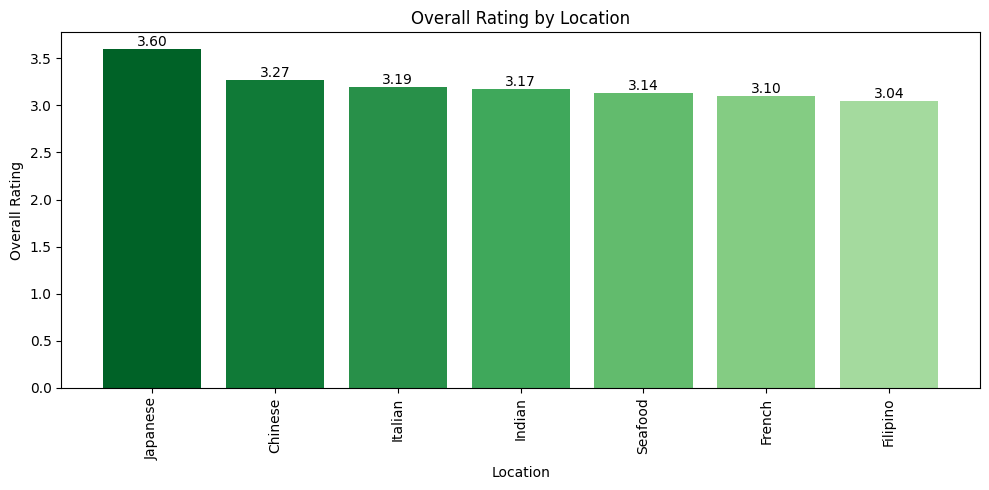

In [168]:
plt.figure(figsize=(10, 5))
bar_value = plt.bar(cuisines_rate['Cuisines'], cuisines_rate['OverallRating'], color=sns.color_palette('Greens_r', 10))
plt.bar_label(bar_value, fmt='%.2f', label_type='edge')
plt.xlabel('Location')
plt.ylabel('Overall Rating')
plt.title('Overall Rating by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [171]:
Age_rate = df1.groupby('Age_group').agg({'FoodRating':'mean', "ServiceRating":'mean', "OverallRating":'mean'}).sort_values(by='OverallRating', ascending=False).reset_index()
Age_rate.style.background_gradient(cmap='summer')

,Age_group,FoodRating,ServiceRating,OverallRating
0,Young,3.333333,3.666667,3.500000
1,Adult,3.282051,3.282051,3.282051
2,Middle age,3.093750,3.421875,3.257812
3,Seniors,3.269231,2.865385,3.067308


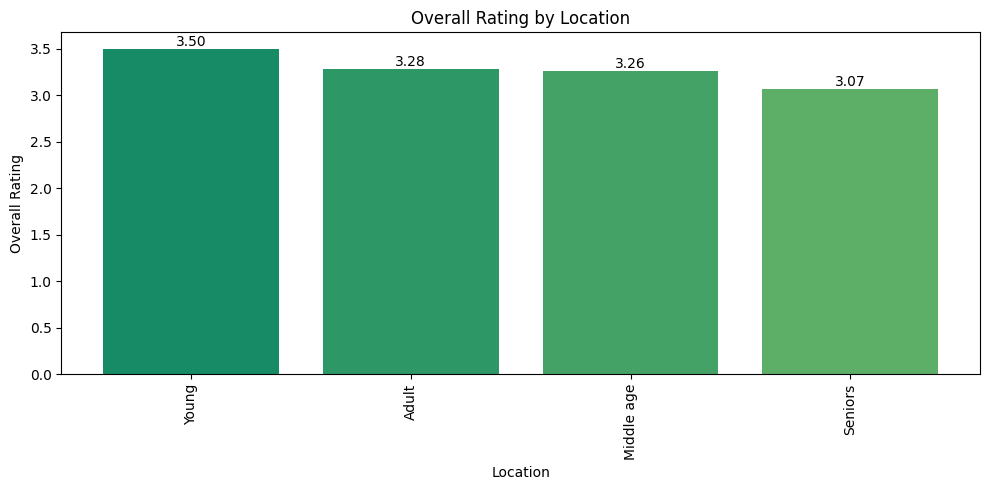

In [172]:
plt.figure(figsize=(10, 5))
bar_value = plt.bar(Age_rate['Age_group'], Age_rate['OverallRating'], color=sns.color_palette('summer', 10))
plt.bar_label(bar_value, fmt='%.2f', label_type='edge')
plt.xlabel('Location')
plt.ylabel('Overall Rating')
plt.title('Overall Rating by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()